In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

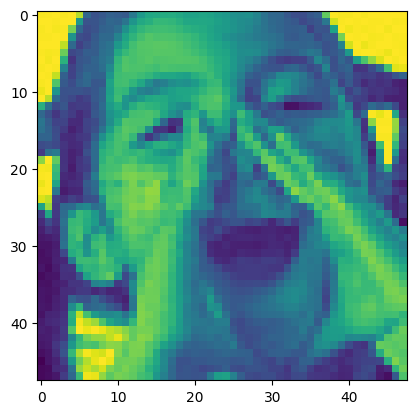

In [5]:
# Load the image
image_path = r"C:\Users\Haya Osama\Downloads\Digital_Project\Emoji-Detection-System\FER-2013_sampled\FER-2013_sampled\train_balanced_7000\angry\Training_63181.jpg" 

image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)


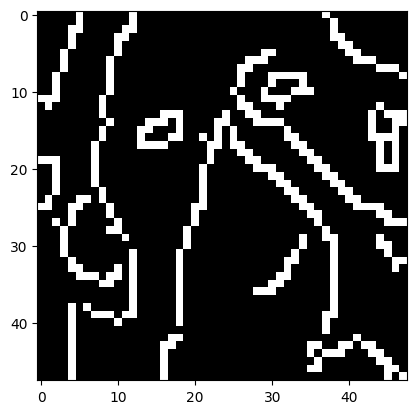

In [6]:
# 1. Gaussian Blur + Canny Edge Detection
gaussian = cv2.GaussianBlur(gray_image, (5, 5), 0)
canny = cv2.Canny(gaussian, 100, 200)
plt.imshow(canny, cmap='gray')

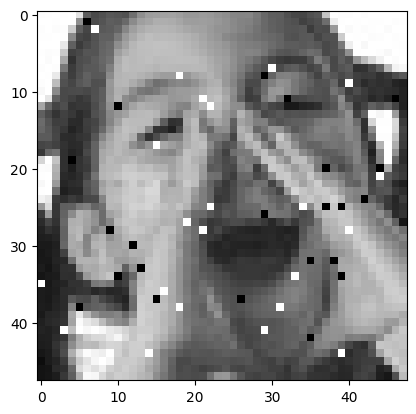

In [7]:
# 2 Add Salt-and-Pepper Noise
def add_salt_pepper_noise(image, salt_prob, pepper_prob):
    noisy = np.copy(image)
    total_pixels = image.size
    salt_pixels = int(total_pixels * salt_prob)
    pepper_pixels = int(total_pixels * pepper_prob)
    
    coords_salt = [np.random.randint(0, i - 1, salt_pixels) for i in image.shape]
    coords_pepper = [np.random.randint(0, i - 1, pepper_pixels) for i in image.shape]
    
    noisy[coords_salt[0], coords_salt[1]] = 255
    noisy[coords_pepper[0], coords_pepper[1]] = 0
    return noisy

noisy_sp = add_salt_pepper_noise(gray_image, 0.01, 0.01)
plt.imshow(noisy_sp, cmap='gray')


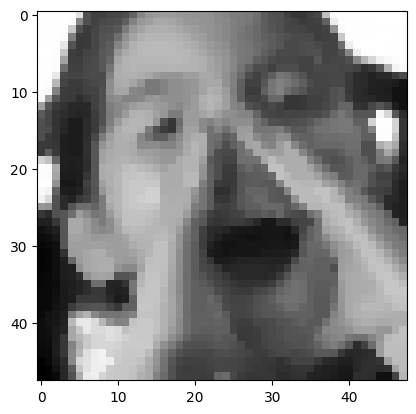

In [8]:
# 3. Remove Salt-and-Pepper Noise using Median Filter
denoised = cv2.medianBlur(noisy_sp, 3)
plt.imshow(denoised, cmap='gray')

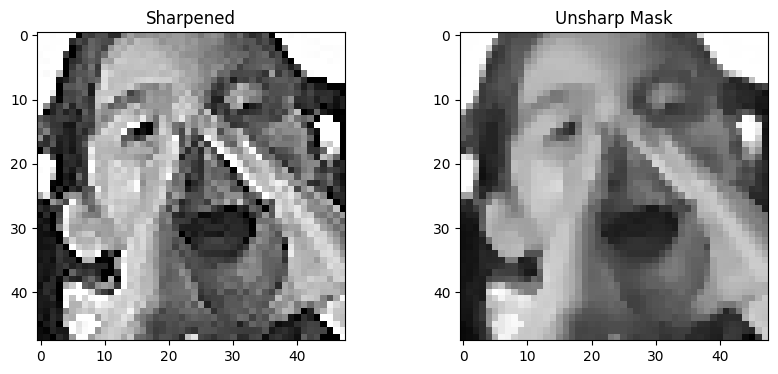

In [9]:
# Apply sharpening
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpened = cv2.filter2D(denoised, -1, sharpen_kernel)

# Optional: use unsharp mask for better sharpening
blurred = cv2.GaussianBlur(denoised, (5, 5), 0)
unsharp_mask = cv2.addWeighted(denoised, 1.5, blurred, -0.5, 0)

# Show results
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.imshow(sharpened, cmap='gray'), plt.title('Sharpened')
plt.subplot(1,2,2), plt.imshow(unsharp_mask, cmap='gray'), plt.title('Unsharp Mask')
plt.show()
# Save the processed images
output_dir = Path("processed_images")

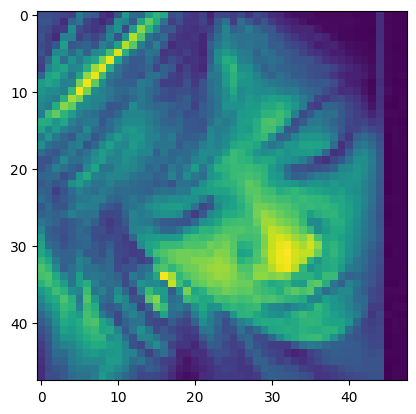

In [14]:
# Load the image
image_path2 = r"C:\Users\Haya Osama\Downloads\Digital_Project\Emoji-Detection-System\FER-2013_sampled\FER-2013_sampled\train_balanced_7000\sad\Training_99783041.jpg"

image2 = cv2.imread(image_path2)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image2)


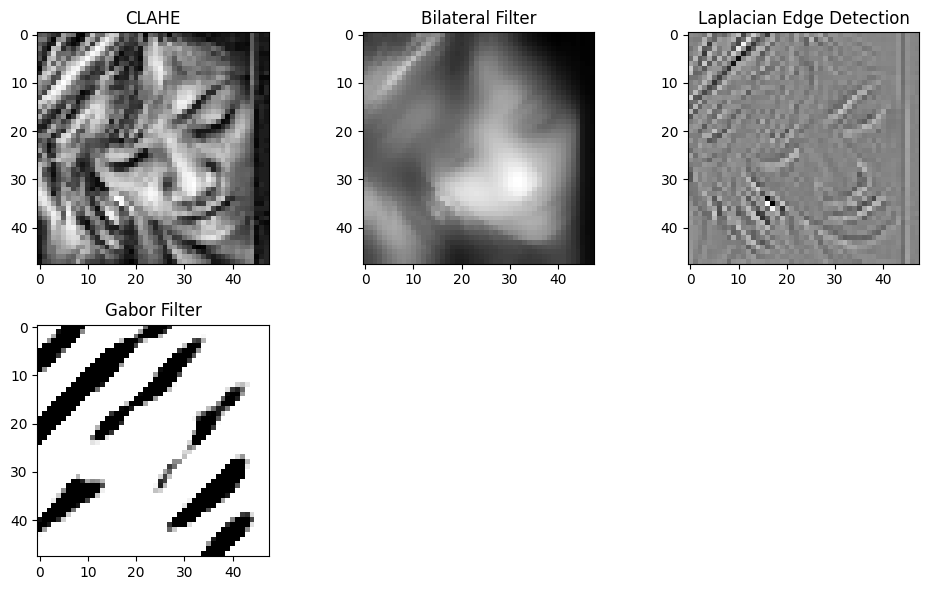

In [15]:
# 8. CLAHE for contrast enhancement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray_image2)

# 9. Bilateral Filter (edge-preserving smoothing)
bilateral = cv2.bilateralFilter(gray_image2, d=9, sigmaColor=75, sigmaSpace=75)

# 10. Laplacian Edge Detection
laplacian = cv2.Laplacian(gray_image2, cv2.CV_64F)

# 11. Gabor Filter (texture extraction)
g_kernel = cv2.getGaborKernel((21, 21), 8.0, np.pi/4, 10.0, 0.5, 0)
gabor_filtered = cv2.filter2D(gray_image2, cv2.CV_8UC3, g_kernel)
# Show results
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1), plt.imshow(clahe_img, cmap='gray'), plt.title('CLAHE')
plt.subplot(2, 3, 2), plt.imshow(bilateral, cmap='gray'), plt.title('Bilateral Filter')
plt.subplot(2, 3, 3), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian Edge Detection')
plt.subplot(2, 3, 4), plt.imshow(gabor_filtered, cmap='gray'), plt.title('Gabor Filter')
plt.tight_layout()
plt.show()

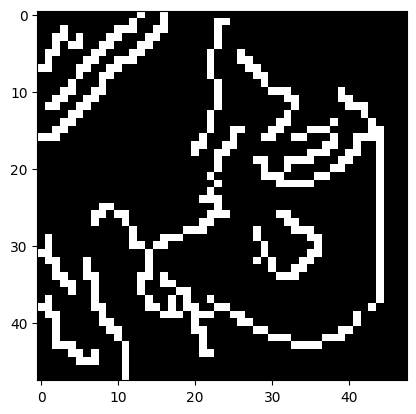

In [16]:
# 1. Gaussian Blur + Canny Edge Detection
gaussian = cv2.GaussianBlur(gray_image2, (5, 5), 0)
canny = cv2.Canny(gaussian, 100, 200)
plt.imshow(canny, cmap='gray')

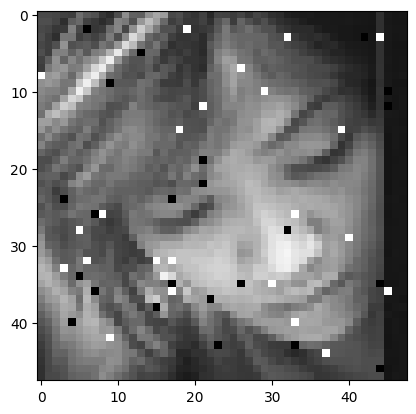

In [18]:
# 5. Add Salt-and-Pepper Noise
def add_salt_pepper_noise(image, salt_prob, pepper_prob):
    noisy = np.copy(image)
    total_pixels = image.size
    salt_pixels = int(total_pixels * salt_prob)
    pepper_pixels = int(total_pixels * pepper_prob)
    
    coords_salt = [np.random.randint(0, i - 1, salt_pixels) for i in image.shape]
    coords_pepper = [np.random.randint(0, i - 1, pepper_pixels) for i in image.shape]
    
    noisy[coords_salt[0], coords_salt[1]] = 255
    noisy[coords_pepper[0], coords_pepper[1]] = 0
    return noisy

noisy_sp = add_salt_pepper_noise(gray_image2, 0.01, 0.01)
plt.imshow(noisy_sp, cmap='gray')

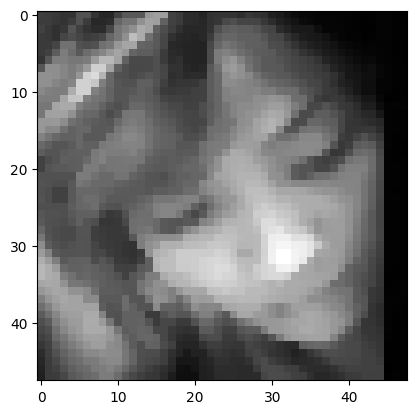

In [20]:
# 6. Remove Salt-and-Pepper Noise using Median Filter
denoised = cv2.medianBlur(noisy_sp, 3)
plt.imshow(denoised, cmap='gray')

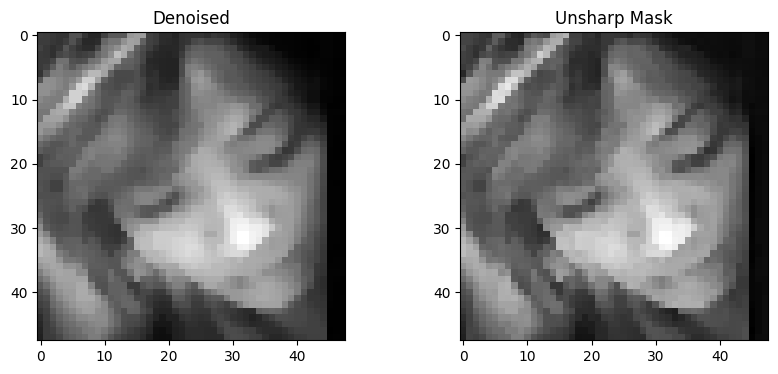

In [21]:
# 7. Apply Unsharp Mask to enhance resolution
blurred = cv2.GaussianBlur(denoised, (5, 5), 0)
unsharp_mask = cv2.addWeighted(denoised, 1.5, blurred, -0.5, 0)
# Show results
plt.figure(figsize=(10, 4))     
plt.subplot(1, 2, 1), plt.imshow(denoised, cmap='gray'), plt.title('Denoised')
plt.subplot(1, 2, 2), plt.imshow(unsharp_mask, cmap='gray'), plt.title('Unsharp Mask')
plt.show()

In [29]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# — FER-2013_sampled is right under the project root
SAMPLE_DIR = os.path.join(BASE_DIR, "FER-2013_sampled")
TRAIN_DIR = os.path.join(SAMPLE_DIR, r'C:\Users\Haya Osama\Downloads\Digital_Project\Emoji-Detection-System\FER-2013_sampled\FER-2013_sampled\train_balanced_7000')
#src_folder = "Emoji-Detection-System\FER-2013_sampled\FER-2013_sampled\train_balanced_7000"
dst_base_folder = "filtered_dataset"

# Salt and pepper noise function
def add_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy = np.copy(image)
    total_pixels = image.size
    salt_pixels = int(total_pixels * salt_prob)
    pepper_pixels = int(total_pixels * pepper_prob)
    coords_salt = [np.random.randint(0, i - 1, salt_pixels) for i in image.shape]
    coords_pepper = [np.random.randint(0, i - 1, pepper_pixels) for i in image.shape]
    noisy[coords_salt[0], coords_salt[1]] = 255
    noisy[coords_pepper[0], coords_pepper[1]] = 0
    return noisy



In [30]:
# Create filtered folders for each type
filter_names = ["gaussian_blur", "canny_edge", "salt_pepper", "median_denoised"]
for f in filter_names:
    for emotion in os.listdir(TRAIN_DIR):
        os.makedirs(os.path.join(dst_base_folder, f, emotion), exist_ok=True)

In [31]:
# Process and save filtered images
for emotion in os.listdir(TRAIN_DIR):
    emotion_path = os.path.join(TRAIN_DIR, emotion)
    for img_name in os.listdir(emotion_path):
        img_path = os.path.join(emotion_path, img_name)
        img = cv2.imread(img_path, 0)  # grayscale
        if img is None:
            continue

        # 1. Gaussian Blur
        blurred = cv2.GaussianBlur(img, (5, 5), 0)
        cv2.imwrite(os.path.join(dst_base_folder, "gaussian_blur", emotion, img_name), blurred)

        # 2. Canny Edge Detection
        canny = cv2.Canny(blurred, 100, 200)
        cv2.imwrite(os.path.join(dst_base_folder, "canny_edge", emotion, img_name), canny)

        # 3. Add Salt and Pepper Noise
        noisy = add_salt_pepper_noise(img)
        cv2.imwrite(os.path.join(dst_base_folder, "salt_pepper", emotion, img_name), noisy)

        # 4. Remove Noise using Median Filter
        denoised = cv2.medianBlur(noisy, 3)
        cv2.imwrite(os.path.join(dst_base_folder, "median_denoised", emotion, img_name), denoised)

print("Filtering complete. Images saved to 'filtered_dataset' folder.")


Filtering complete. Images saved to 'filtered_dataset' folder.
